In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\ffpin\OneDrive\Documents\movies.csv')




In [2]:
# Check to see if there is any missing data
# Loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [3]:
# Check to see the data types for each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# change data types of columns

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [40]:
# Sort by Gross income 
# Order Data a little bit to see

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [41]:
# look at all the data

pd.set_option('display.max_rows', None)

In [29]:
# Drop any duplicates

df = df['company'].drop_duplicates().sort_values(ascending=False)

In [ ]:
# High corealation to the gross income of the movie
# - Budget
# - Company


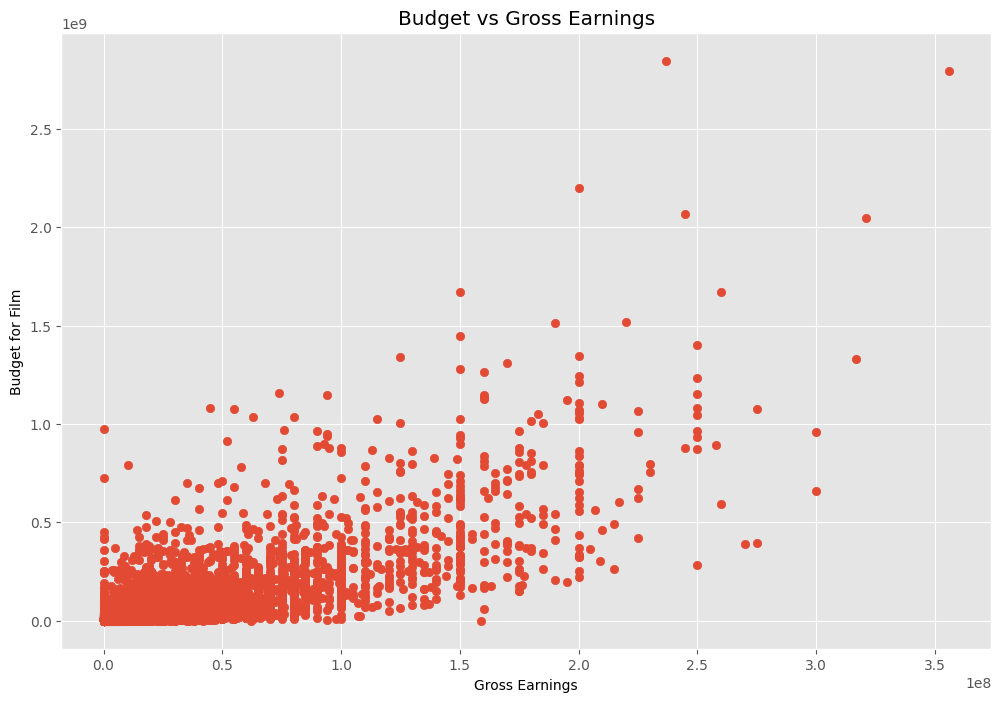

In [5]:
# Scatter plot with budget vs gross revenue



plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()


<Axes: xlabel='budget', ylabel='gross'>

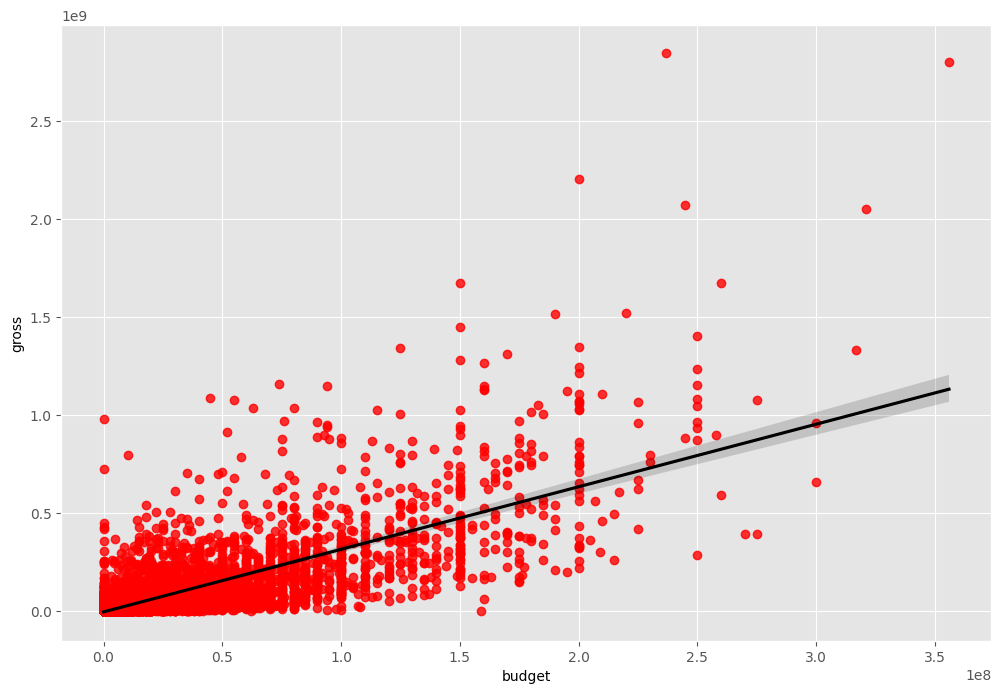

In [48]:
# Plot the budget  vs gross using seaborn

sns.regplot(x= 'budget', y= 'gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [ ]:
# Looking at correlation

In [6]:
df.corr(method='pearson',numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [ ]:
# High correlation between budget and gross
# Close to a 75%

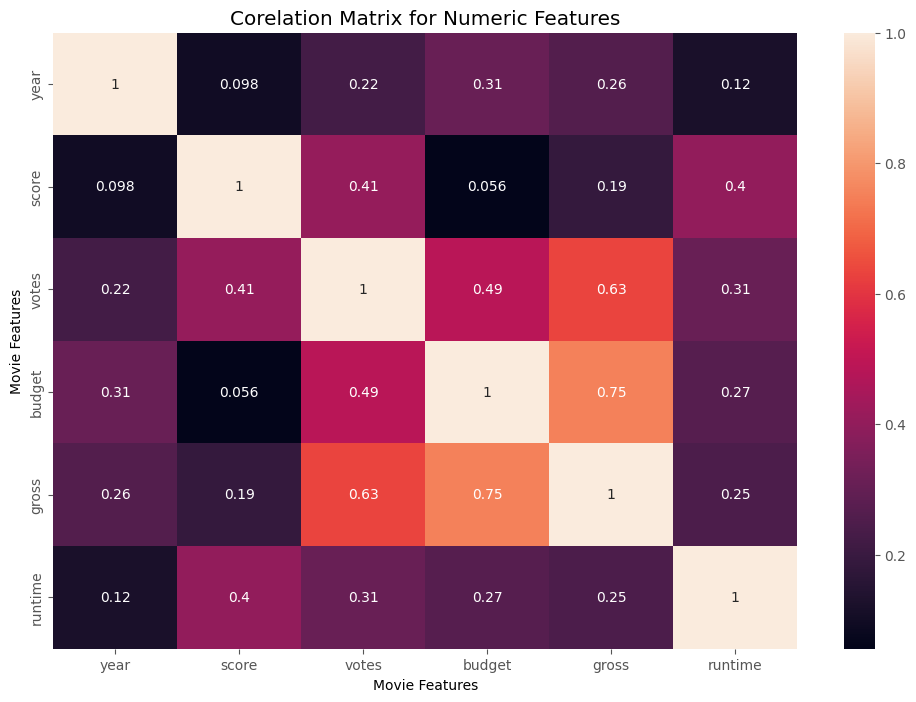

In [53]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Corelation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [7]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        

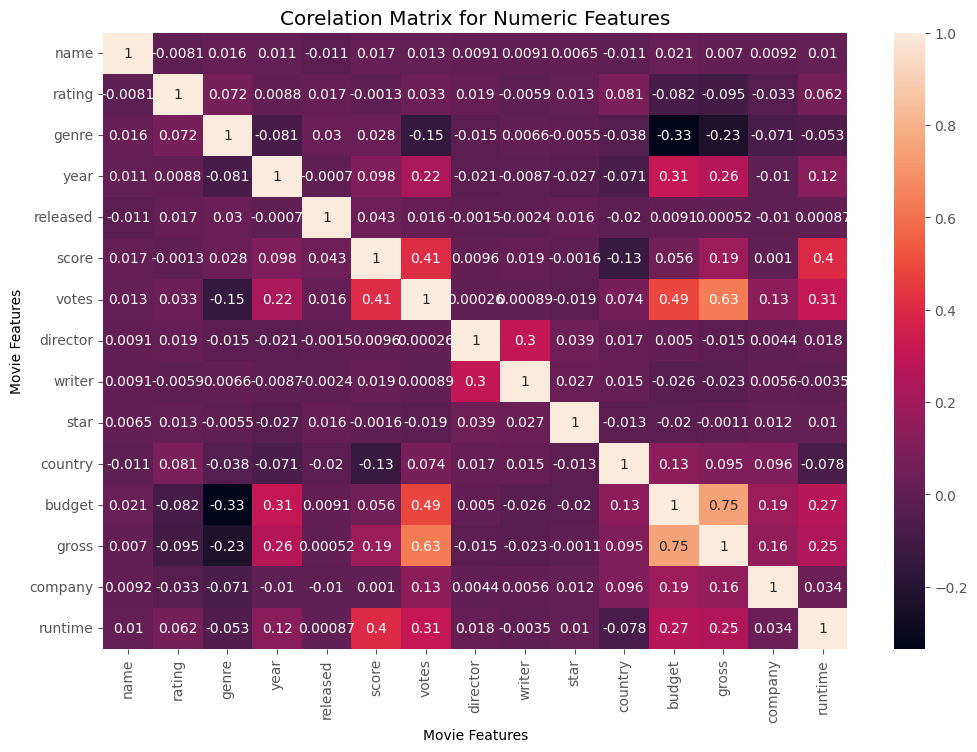

In [58]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Corelation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [8]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()


In [10]:
sorted_pairs = corr_pairs.sort_values()

In [11]:
# High Correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]


In [ ]:
# Votes and Budget have the highest correlation to gross earnings

# Company has low correlation